# Python: Tips Dataset

For this example, the following packages will be imported:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We load and read the dataset with pandas, and print the first 5 rows

In [11]:
tips = pd.read_csv("../resources/example-datasets/datasets/tips.csv")
tips.head(5)

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


We can print out some basic information about the dataframe columns' types

In [12]:
tips.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 49.3 KB


And we can see that any `string` value is mapped to an `object` value. We know that those are categorical variables, so we can use less memory specifying the `category` type in a dictionary, and we use it when loading the dataset.

In [13]:
cat_dtypes = {
    "smoker": "category",
    "day": "category",
    "time": "category",
}
tips = pd.read_csv("../resources/example-datasets/datasets/tips.csv", dtype=cat_dtypes)

In [14]:
tips.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   smoker      244 non-null    category
 3   day         244 non-null    category
 4   time        244 non-null    category
 5   size        244 non-null    int64   
dtypes: category(3), float64(2), int64(1)
memory usage: 7.2 KB


And we can see that with this approach, the memory usage dropped from 49.3 KB to 7.2 KB. For small datasets like this, it does not make any difference, but with bigger one this feature can be very useful for not wasting memory.

We can compute some basic statistics an all values using the `describe()` method

In [15]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Let's compute some more domain specific statistics

1. Percentage of smokers

In [16]:
tips["smoker"].value_counts(normalize=True)

smoker
No     0.618852
Yes    0.381148
Name: proportion, dtype: float64

2. All data about the most expensive `total_bill`

In [22]:
tips.iloc[tips["total_bill"].idxmax()]

total_bill     50.81
tip             10.0
smoker           Yes
day              Sat
time          Dinner
size               3
Name: 170, dtype: object

3. Get the highest bill per person (`size`) in a table

In [25]:
(tips["total_bill"] / tips["size"]).max()

20.275

4. Group `total_bill` in 10 equally spaced ranges, and counting the number of bills in each range.

In [118]:
ranges = np.arange(0, tips["total_bill"].max(), 5)
billRanges = pd.cut(tips["total_bill"], ranges).value_counts().sort_index()
billRanges

total_bill
(0.0, 5.0]       1
(5.0, 10.0]     16
(10.0, 15.0]    63
(15.0, 20.0]    67
(20.0, 25.0]    42
(25.0, 30.0]    23
(30.0, 35.0]    16
(35.0, 40.0]     6
(40.0, 45.0]     5
(45.0, 50.0]     4
Name: count, dtype: int64

We can graph them easily with:

<Axes: title={'center': 'Total Bills Distribution'}, xlabel='total_bill', ylabel='count'>

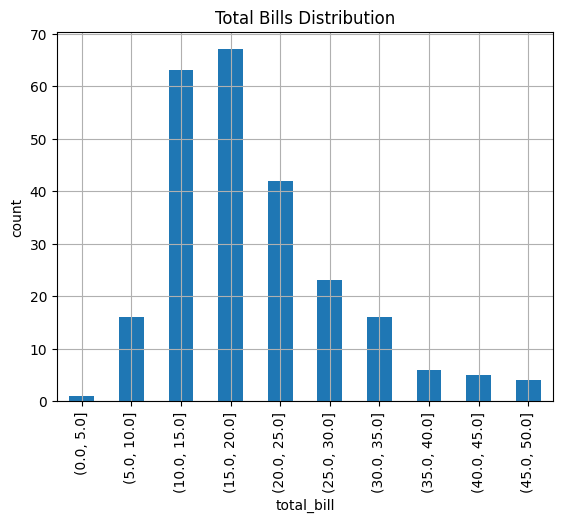

In [119]:
billRanges.plot(kind="bar", grid=True, title="Total Bills Distribution", ylabel="count")